In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#############################################
import numpy as np
import pandas as pd
from datetime import datetime as dt
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

dateparse = lambda x: datetime.strptime(x, '%m/%d/%y')

data_ibm=pd.read_csv('./datasets/IBMStock.csv', parse_dates=['Date'], date_parser=dateparse)
data_ge=pd.read_csv('./datasets/GEStock.csv', parse_dates=['Date'], date_parser=dateparse)
data_coke=pd.read_csv('./datasets/CocaColaStock.csv', parse_dates=['Date'], date_parser=dateparse)
data_pg=pd.read_csv('./datasets/ProcterGambleStock.csv', parse_dates=['Date'], date_parser=dateparse)
data_boe=pd.read_csv('./datasets/BoeingStock.csv', parse_dates=['Date'], date_parser=dateparse)

data_ibm_prof = data_ibm
data_ibm_prof['StockPrice'] = data_ibm_prof['StockPrice'].diff()
data_ge_prof = data_ge
data_ge_prof['StockPrice'] = data_ge_prof['StockPrice'].diff()
data_coke_prof = data_coke
data_coke_prof['StockPrice'] = data_coke_prof['StockPrice'].diff()
data_pg_prof = data_pg
data_pg_prof['StockPrice'] = data_pg_prof['StockPrice'].diff()
data_boe_prof = data_boe
data_boe_prof['StockPrice'] = data_boe_prof['StockPrice'].diff()

#print("Total IBM: ",data_ibm_prof['StockPrice'].sum())
#print("Total GE: ",data_ge_prof['StockPrice'].sum())
#print("Total Coke: ",data_coke_prof['StockPrice'].sum())
#print("Total PG: ",data_pg_prof['StockPrice'].sum())
#print("Total BOE: ",data_boe_prof['StockPrice'].sum())

data_ibm_prof_list = data_ibm_prof['StockPrice'].to_numpy()
data_ge_prof_list = data_ge_prof['StockPrice'].to_numpy()
data_coke_prof_list = data_coke_prof['StockPrice'].to_numpy()
data_pg_prof_list = data_pg_prof['StockPrice'].to_numpy()
data_boe_prof_list = data_boe_prof['StockPrice'].to_numpy()

data_ibm_prof_list = np.delete(data_ibm_prof_list, 0)
data_ge_prof_list = np.delete(data_ge_prof_list, 0)
data_coke_prof_list = np.delete(data_coke_prof_list, 0)
data_pg_prof_list = np.delete(data_pg_prof_list, 0)
data_boe_prof_list = np.delete(data_boe_prof_list, 0)

#len(data_ibm_prof_list)
stonks_dynam = [data_coke_prof_list,data_boe_prof_list,data_ge_prof_list,data_ibm_prof_list, data_pg_prof_list]

In [198]:
def plot_history(history):
  rewards = history["rewards"]
  cum_rewards = history["cum_rewards"]
  chosen_arms = history["arms"]
  name = ['IBM','General Electric','Coca Cola','Procter and Gamble','Boeing']
  fig = plt.figure(figsize=[30,8])

  ax2 = fig.add_subplot(121)
  ax2.plot(cum_rewards, label="avg rewards")
  ax2.set_title("Кумулятивна Винагорода")

  ax3 = fig.add_subplot(122)
  ax3.bar(name[0:5], chosen_arms, label="chosen arms")
  ax3.set_title("Обрані Компанії")

In [3]:
class Env(object):

  def __init__(self, reward_probas, rewards):
    if len(reward_probas) != len(rewards):
      raise Exception(f"поганий розмір : {len(reward_probas)} не співпадає: {len(rewards)}")

    self.reward_probas = reward_probas
    self.rewards = rewards 
    self.k_arms = len(rewards)

  def choose_arm(self, arm,mun):
    if arm < 0 or arm > self.k_arms:
      raise Exception(f"ненульве значення потрібне {self.k_arms -1}")

    return self.rewards[arm][mun] if np.random.random() < self.reward_probas[arm] else 0.0

In [4]:
environment = Env(reward_probas=[1, 1, 1, 1, 1], rewards=stonks_dynam,)
print(f"Reward Probas\t\t: {environment.reward_probas}")
print(f"Rewards \t\t: {environment.rewards}")

Reward Probas		: [1, 1, 1, 1, 1]
Rewards 		: [array([-1.77704261e+00, -2.52957390e-01, -4.53218615e+00, -7.52733766e+00,
        2.73688312e+00, -3.07272730e-01, -1.86437230e+00,  2.89904762e+00,
        5.29532468e+00,  2.97231818e+00,  3.55586364e+00,  5.76636360e-01,
        1.42805263e+00,  5.03633867e+00,  6.24260870e+00,  1.42450000e+00,
        2.86640910e+00, -2.01861500e-01,  1.43458880e+00,  4.26826840e+00,
        1.86380950e+00, -1.10761910e+00,  7.55008660e+00,  1.19372300e+00,
        6.84509520e+00,  3.55209090e+00,  1.21690910e+00,  3.75818200e-01,
        1.95363630e+00,  6.30854550e+00,  6.23121740e+00, -6.93071740e+00,
        2.63004550e+00,  3.41945450e+00,  3.51915790e+00,  3.21127800e-01,
       -2.81375940e+00,  5.42655500e-01, -3.66268180e+00, -4.55868180e+00,
        5.26580080e+00,  1.15095240e+00, -7.24844000e-02,  8.23386700e-01,
       -9.59954000e-02, -4.62014500e+00, -1.55563333e+01, -2.44290910e+00,
       -7.26356460e+00,  2.17042610e+00, -6.59000000e+

In [5]:
[environment.choose_arm(0,1) for _ in range(10)]

[-0.25295738999999173,
 -0.25295738999999173,
 -0.25295738999999173,
 -0.25295738999999173,
 -0.25295738999999173,
 -0.25295738999999173,
 -0.25295738999999173,
 -0.25295738999999173,
 -0.25295738999999173,
 -0.25295738999999173]

In [6]:
class RandomAgent(object):

  def __init__(self, env, max_iterations=2000):
    self.env = env
    self.iterations = max_iterations

  def act(self):
    arm_counts = np.zeros(self.env.k_arms)
    rewards = []
    cum_rewards = []

    for i in range(1, self.iterations + 1):
      arm = np.random.choice(self.env.k_arms)
      reward = self.env.choose_arm(arm,i)

      arm_counts[arm] += 1
      rewards.append(reward)
      cum_rewards.append(sum(rewards)/ len(rewards))

    return {"вибори": arm_counts, "винагороди": rewards, "кумулятивні": cum_rewards}

In [43]:
def randTest():
    random_agent = RandomAgent(env=environment, max_iterations=478)
    ra_history = random_agent.act()
    #print(f"TOTAL REWARD : {sum(ra_history['rewards'])}")
    return sum(ra_history['rewards'])
#print(greedTest())
less1 = 0
more1 = []
for i in range(1000):
    res = randTest()
    if res > 0:
        more1.append(res)
    else:
        less1 = less1 + 1
print('Less: ', less1, 'More: ', len(more1))

Less:  624 More:  376


Кінцева винагорода : -143.5507008699999


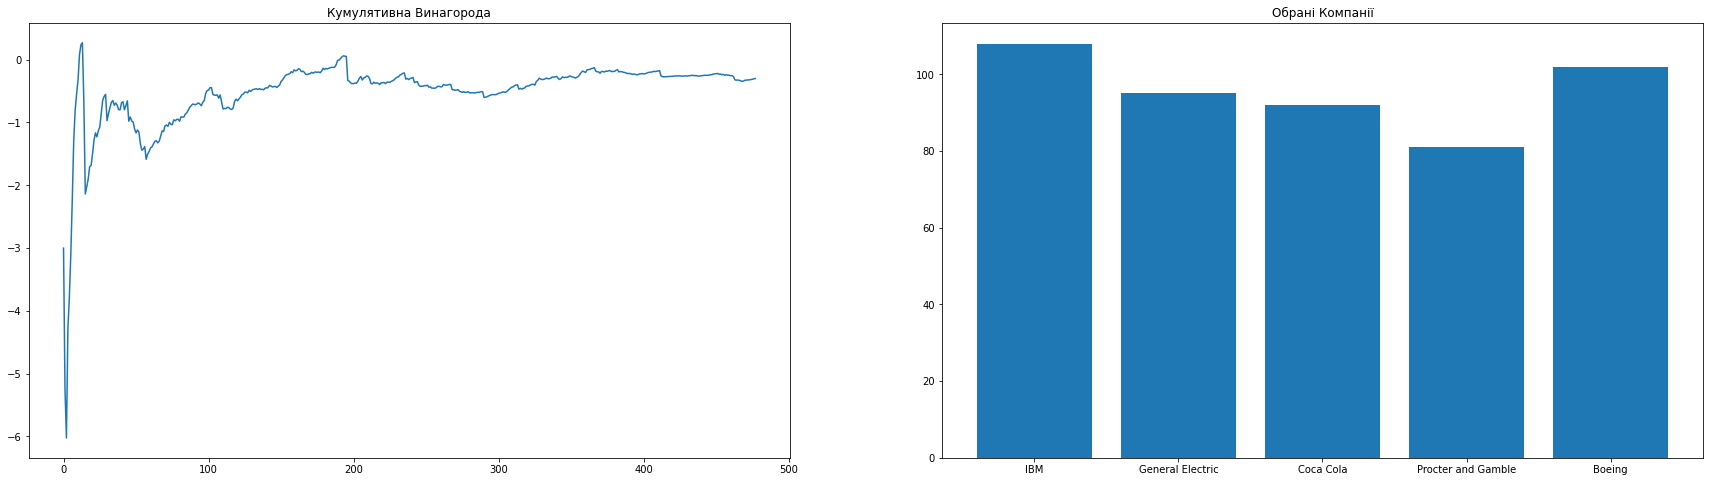

In [37]:
random_agent = RandomAgent(env=environment, max_iterations=478)
ra_history = random_agent.act()
plot_history(ra_history)
print(f"Кінцева винагорода : {sum(ra_history['rewards'])}")


In [65]:
class EpsilonGreedyAgent(object):

  def __init__(self, env, max_iterations=5, epsilon=0, decay=0.001, decay_interval=50):
    self.env = env 
    self.iterations = max_iterations
    self.epsilon = epsilon 
    self.decay = decay 
    self.decay_interval = decay_interval

  def act(self):
    q_values = np.zeros(self.env.k_arms)
    arm_rewards = np.zeros(self.env.k_arms)
    arm_counts = np.zeros(self.env.k_arms)

    rewards = []
    cum_rewards = []
    for i in range(1, self.iterations + 1):
      arm = np.random.choice(self.env.k_arms) if np.random.random() < self.epsilon else np.argmax(q_values)
      reward = self.env.choose_arm(arm,i)
      #print("rewards",sum(rewards))

      arm_rewards[arm] += reward
      arm_counts[arm] += 1
      q_values[arm] = arm_rewards[arm]/arm_counts[arm]

      rewards.append(reward)
      cum_rewards.append(sum(rewards)/ len(rewards))

      if i % self.decay_interval == 0:
        self.epsilon = self.epsilon * self.decay 

    return {"arms": arm_counts, "rewards": rewards, "cum_rewards": cum_rewards}

In [151]:
def greedTest():
    egreedy_agent = EpsilonGreedyAgent(environment, max_iterations=478, epsilon=0.001)
    eg_history = egreedy_agent.act()
    #print(f"TOTAL REWARD : {sum(eg_history['rewards'])}")
    return sum(eg_history['rewards'])
#print(greedTest())
less = 0
more = []
for i in range(1000):
    res = greedTest()
    if res > 0:
        more.append(res)
    else:
        less = less + 1
print('Less: ', less, 'More: ', len(more))
print('Max',max(more))
print('mean', mean(more))

Less:  34 More:  966
Max 15.263293690000019
mean 1.2356450060869673


In [96]:
resuulllltgreed = []
indexxgrid = []
for x in np.arange(0, 1, 0.01):
    egreedy_agent = EpsilonGreedyAgent(environment, max_iterations=478, epsilon=x)
    eg_history = egreedy_agent.act()
    resuulllltgreed.append(sum(eg_history['rewards']))
    indexxgrid.append(x)

In [136]:
max(more)

52.166921920000064

In [135]:
from statistics import mean

mean(more)

6.577146247555556

In [98]:
np.argmax(resuulllltgreed)

88

In [99]:
indexxgrid[88]

0.88

In [61]:
def greedTest():
    egreedy_agent = EpsilonGreedyAgent(environment, max_iterations=478,epsilon=0.001)
    eg_history = egreedy_agent.act()
    #print(f"TOTAL REWARD : {sum(eg_history['rewards'])}")
    return sum(eg_history['rewards'])
#print(greedTest())
#less = 0
more = []
for i in range(1000):
    res = greedTest()
    if res > 0:
        more.append(res)
    else:
        less = less + 1
print('Less: ', less, 'More: ', len(more))

Less:  0 More:  1000


Кінцева винагорода : 3.081440860000008


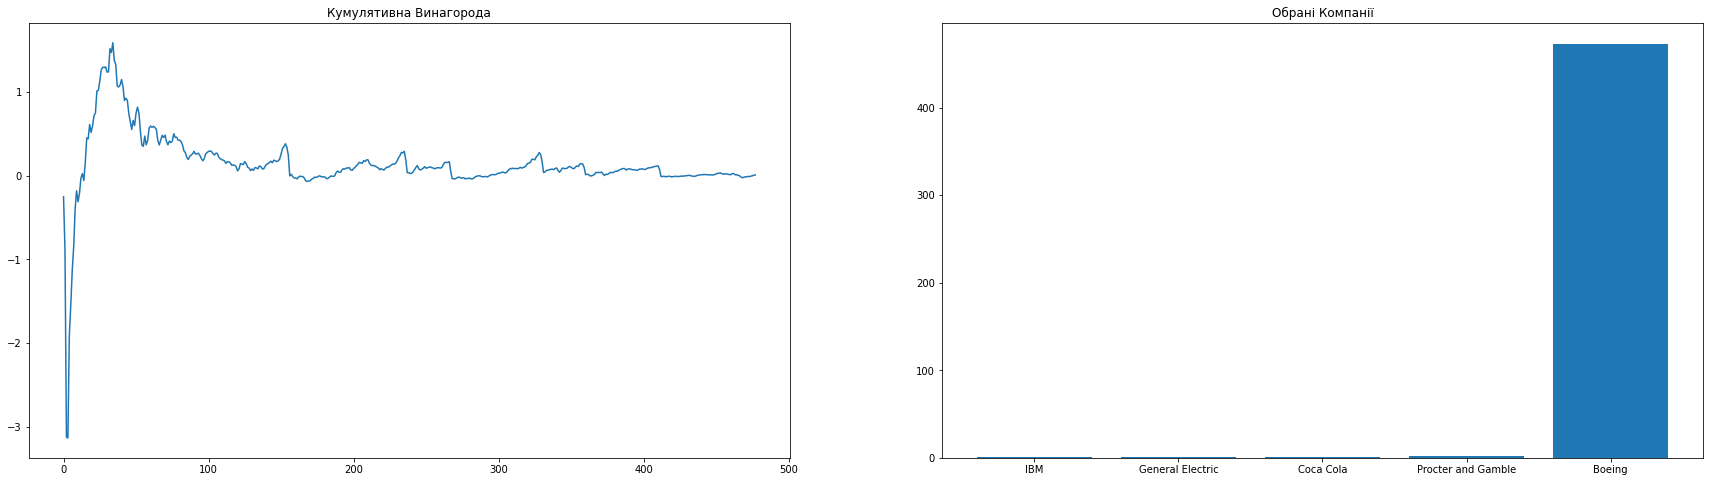

In [279]:
egreedy_agent = EpsilonGreedyAgent(environment, max_iterations=478,epsilon=0.01)
eg_history = egreedy_agent.act()
print(f"Кінцева винагорода : {sum(eg_history['rewards'])}")

plot_history(eg_history)

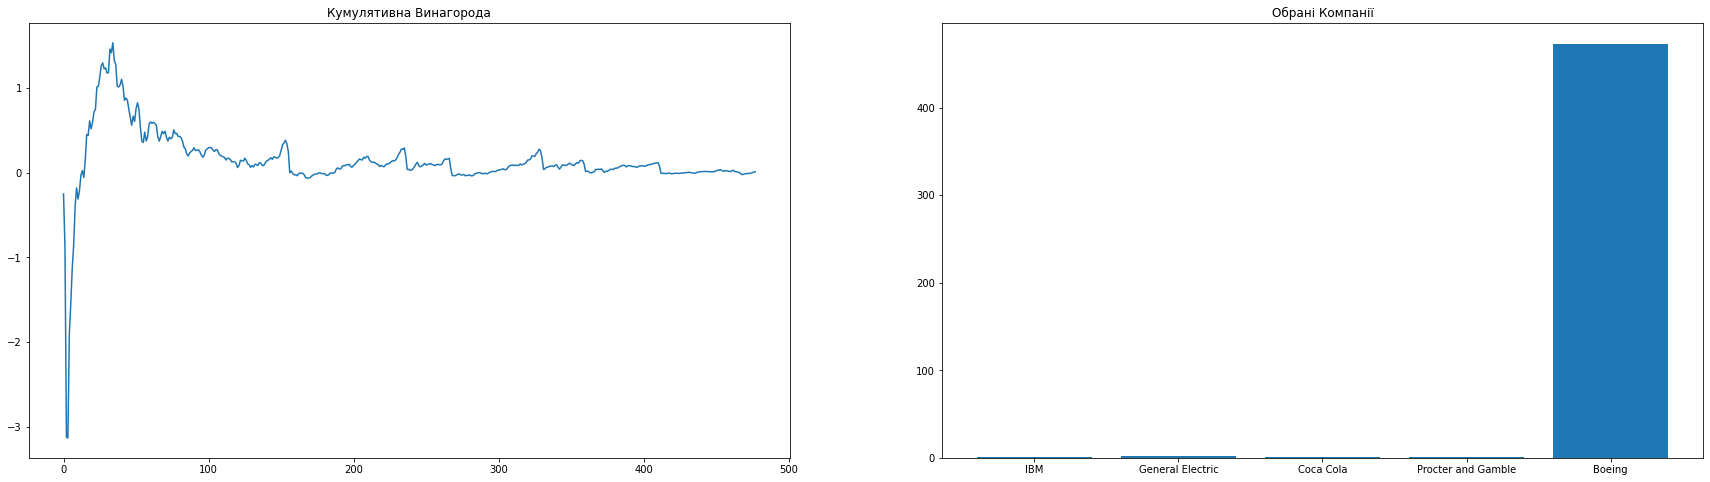

In [222]:
plot_history(eg_history)

In [282]:
max(more)

15.263293690000019

In [295]:
class EpsilonGreedyAgentDecay(object):

  def __init__(self, env, max_iterations=200, epsilon=0.01, decay=0.001, decay_interval=50):
    self.env = env 
    self.iterations = max_iterations
    self.epsilon = epsilon 
    self.decay = decay 
    self.decay_interval = decay_interval

  def act(self):
    q_values = np.zeros(self.env.k_arms)
    arm_rewards = np.zeros(self.env.k_arms)
    arm_counts = np.zeros(self.env.k_arms)

    rewards = []
    cum_rewards = []

    for i in range(1, self.iterations + 1):
      arm = np.random.choice(self.env.k_arms) if np.random.random() < self.epsilon else np.argmax(q_values)
      reward = self.env.choose_arm(arm,i)

      arm_rewards[arm] += reward
      arm_counts[arm] += 1
      q_values[arm] = arm_rewards[arm]/arm_counts[arm]

      rewards.append(reward)
      cum_rewards.append(sum(rewards)/ len(rewards))

      if i % self.decay_interval == 0:
        self.epsilon = self.epsilon * self.decay 

    return {"arms": arm_counts, "rewards": rewards, "cum_rewards": cum_rewards}

In [71]:
def greedDacayTest():
    egreedy_agent2 = EpsilonGreedyAgentDecay(environment, max_iterations=478, epsilon=0.11)
    eg_history2 = egreedy_agent2.act()
    #print(f"TOTAL REWARD : {sum(eg_history['rewards'])}")
    return sum(eg_history2['rewards'])
#print(greedTest())
less2 = 0
more2 = []
for i in range(1000):
    res = greedDacayTest()
    if res > 0:
        more2.append(res)
    else:
        less2 = less2 + 1
print('Less: ', less2, 'More: ', len(more2))

NameError: name 'EpsilonGreedyAgentDecay' is not defined

In [280]:
class OptimisticAgent(object):

  def __init__(self, env, initial_q=10, initial_visits=100, max_iterations=2000):
    self.env = env
    self.initial_q = initial_q
    self.initial_visits = initial_visits
    self.iterations = max_iterations 

  def act(self):
    q_values = np.ones(self.env.k_arms) * self.initial_q
    arm_counts = np.ones(self.env.k_arms) * self.initial_visits
    arm_rewards = np.zeros(self.env.k_arms)

    rewards = []
    cum_rewards = []

    for i in range(1, self.iterations):
      arm = np.argmax(q_values)
      reward = self.env.choose_arm(arm,i)

      arm_rewards[arm] += reward
      arm_counts[arm] += 1
      q_values[arm] = arm_rewards[arm] / arm_counts[arm]

      rewards.append(reward)
      cum_rewards.append(sum(rewards)/len(rewards))

    return {"arms" : arm_counts, "rewards": rewards, "cum_rewards": cum_rewards}

In [281]:
#optimistic_agent = OptimisticAgent(environment, initial_q=1, initial_visits=10, max_iterations=478)
#oa_history = optimistic_agent.act()
#print(f"TOTAL REWARDS : {sum(oa_history['rewards'])}")
def opttest():
    optimistic_agent = OptimisticAgent(environment, initial_q=4, initial_visits=30, max_iterations=478)
    oa_history = optimistic_agent.act()
    #print(f"TOTAL REWARD : {sum(oa_history['rewards'])}")
    return sum(oa_history['rewards'])

less3 = 0
more3 = []
for i in range(1000):
    res = opttest()
    if res > 0:
        more3.append(res)
    else:
        less3 = less3 + 1
print('Less: ', less3, 'More: ', len(more3))

Less:  0 More:  1000


Кінцева винагорода : -106.51804303999995


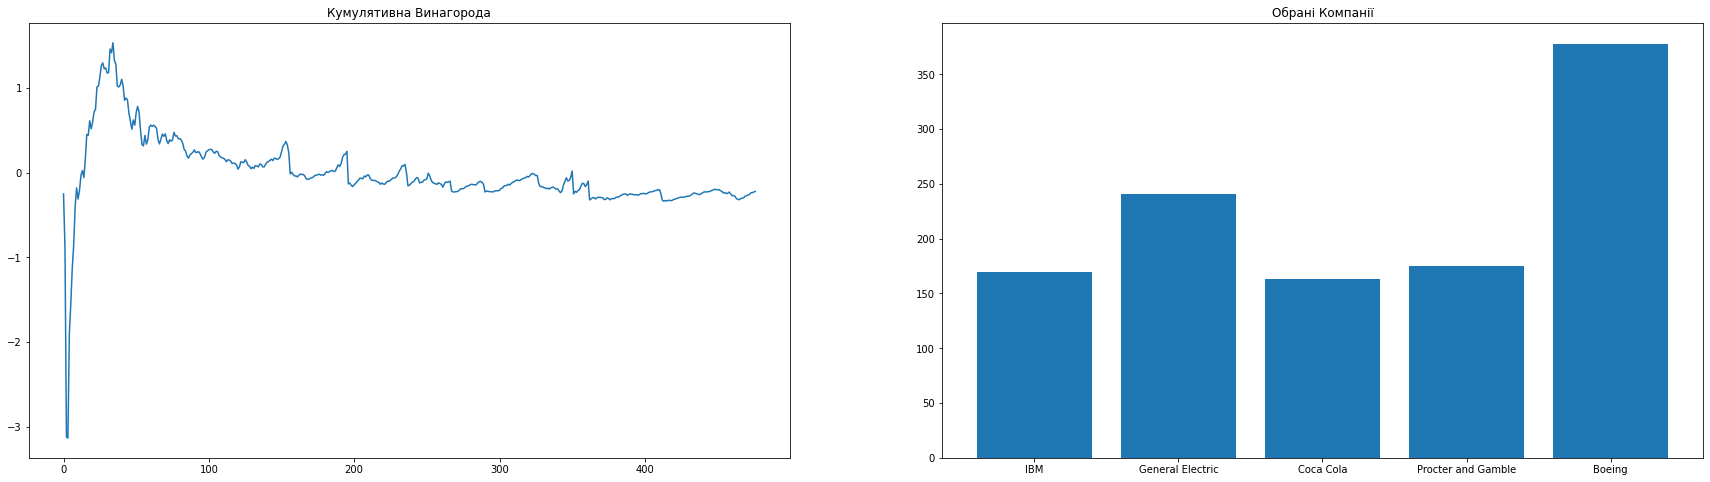

In [367]:
optimistic_agent = OptimisticAgent(environment, initial_q=20, initial_visits=130, max_iterations=478)
oa_history = optimistic_agent.act()
print(f"Кінцева винагорода : {sum(oa_history['rewards'])}")
plot_history(oa_history)

In [343]:
resuulllltopt = []
indexxopt = []
for x in np.arange(0, 400, 1):
    optimistic_agent = OptimisticAgent(environment, initial_q=10, initial_visits=x, max_iterations=478)
    oa_history = optimistic_agent.act()
    resuulllltopt.append(sum(oa_history['rewards']))
    indexxopt.append(x)
min(resuulllltopt)

-229.6200760600001

In [344]:
max(resuulllltopt)

0.4338045200000096

In [345]:
resuulllltopt

[0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200000096,
 0.4338045200

In [368]:
class UCBAgent(object):

  def __init__(self, env, c=2, max_iterations=438):
    self.env = env
    self.c = c
    self.iterations = max_iterations

  def act(self):
    q_values = np.zeros(self.env.k_arms, dtype=np.float32)
    arm_counts = np.zeros(self.env.k_arms, dtype=np.int)
    arm_rewards = np.zeros(self.env.k_arms, dtype=np.float32)

    rewards = []
    cum_rewards = []

    for i in range(0, self.iterations + 1):
      if i < len(q_values):
        arm = i
      else:
        U = self.c * np.sqrt(np.log(i) / arm_counts)
        arm = np.argmax(q_values + U)

      reward = self.env.choose_arm(arm,i)

      arm_rewards[arm] += reward
      arm_counts[arm] += 1
      q_values[arm] = arm_rewards[arm] / arm_counts[arm]

      rewards.append(reward)
      cum_rewards.append(sum(rewards)/len(rewards))
      #print(rewards)
    return {"arms" : arm_counts, "rewards": rewards, "cum_rewards": cum_rewards}

In [97]:
ucb_agent = UCBAgent(environment, c=-1, max_iterations=478)
ucb_history = ucb_agent.act()
print(f"TOTAL REWARDS : {sum(ucb_history['rewards'])}")
ucb_agent = UCBAgent(environment, c=0, max_iterations=478)
ucb_history = ucb_agent.act()
print(f"TOTAL REWARDS : {sum(ucb_history['rewards'])}")
ucb_agent = UCBAgent(environment, c=1, max_iterations=478)
ucb_history = ucb_agent.act()
print(f"TOTAL REWARDS : {sum(ucb_history['rewards'])}")
ucb_agent = UCBAgent(environment, c=2, max_iterations=478)
ucb_history = ucb_agent.act()
print(f"TOTAL REWARDS : {sum(ucb_history['rewards'])}")
ucb_agent = UCBAgent(environment, c=3, max_iterations=478)
ucb_history = ucb_agent.act()
print(f"TOTAL REWARDS : {sum(ucb_history['rewards'])}")
ucb_agent = UCBAgent(environment, c=4, max_iterations=478)
ucb_history = ucb_agent.act()
print(f"TOTAL REWARDS : {sum(ucb_history['rewards'])}")
ucb_agent = UCBAgent(environment, c=5, max_iterations=478)
ucb_history = ucb_agent.act()
print(f"TOTAL REWARDS : {sum(ucb_history['rewards'])}")
ucb_agent = UCBAgent(environment, c=6, max_iterations=478)
ucb_history = ucb_agent.act()
print(f"TOTAL REWARDS : {sum(ucb_history['rewards'])}")
ucb_agent = UCBAgent(environment, c=7, max_iterations=478)
ucb_history = ucb_agent.act()
print(f"TOTAL REWARDS : {sum(ucb_history['rewards'])}")
ucb_agent = UCBAgent(environment, c=8, max_iterations=478)
ucb_history = ucb_agent.act()
print(f"TOTAL REWARDS : {sum(ucb_history['rewards'])}")

TOTAL REWARDS : -127.52997839000005
TOTAL REWARDS : -112.58629874000003
TOTAL REWARDS : -121.59130361600003
TOTAL REWARDS : -71.73103389600006
TOTAL REWARDS : -84.88850486000007
TOTAL REWARDS : -104.02790900600009
TOTAL REWARDS : -168.28353310000023
TOTAL REWARDS : -61.37702231400005
TOTAL REWARDS : -140.00457219000037
TOTAL REWARDS : -95.31287901400003


In [107]:
ucb_agent = UCBAgent(environment, c=6.8, max_iterations=478)
ucb_history = ucb_agent.act()
print(f"TOTAL REWARDS : {sum(ucb_history['rewards'])}")

TOTAL REWARDS : -51.319698590000066


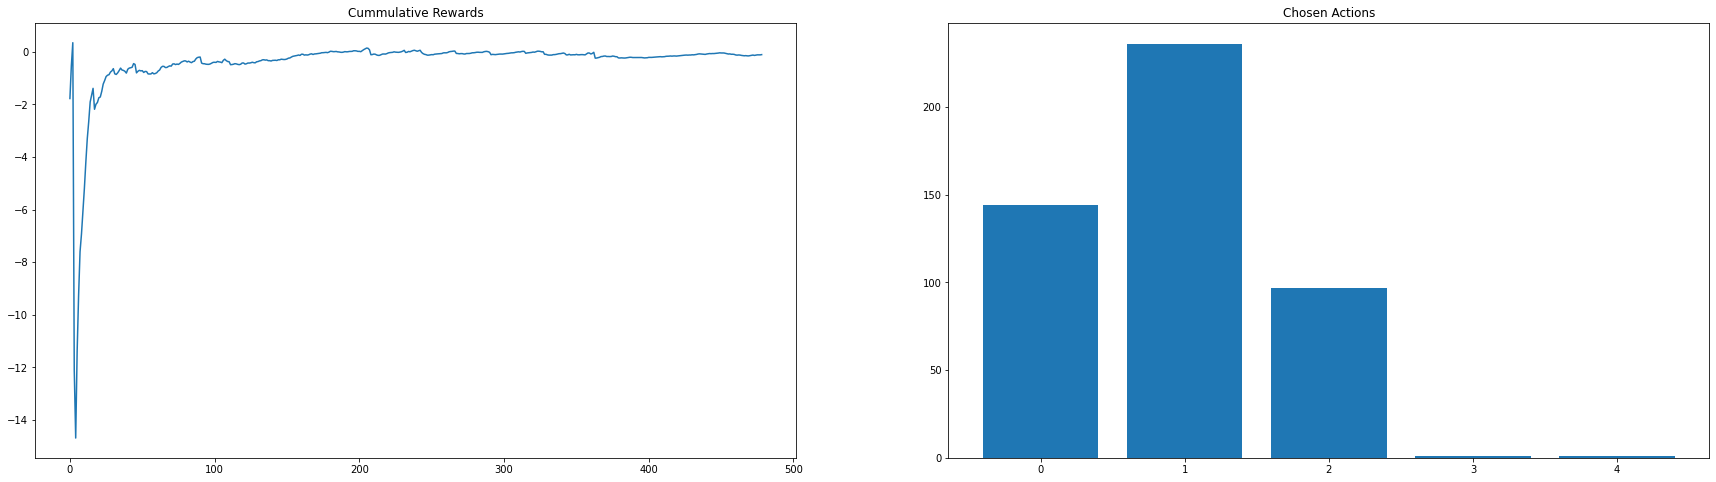

In [108]:
plot_history(ucb_history)

In [369]:
resuullllt = []
indexx = []
for x in np.arange(0, 100, 0.01):
    ucb_agent = UCBAgent(environment, c=x, max_iterations=478)
    ucb_history = ucb_agent.act()
    resuullllt.append(sum(ucb_history['rewards']))
    indexx.append(x)

In [370]:
max(resuullllt)

290.3294891199999

In [371]:
np.argmax(resuullllt)

3187

In [376]:
resuullllt[]

TypeError: list indices must be integers or slices, not float

In [372]:
indexx[3187]

31.87

Кінцева винагорода : 60.217963303999916


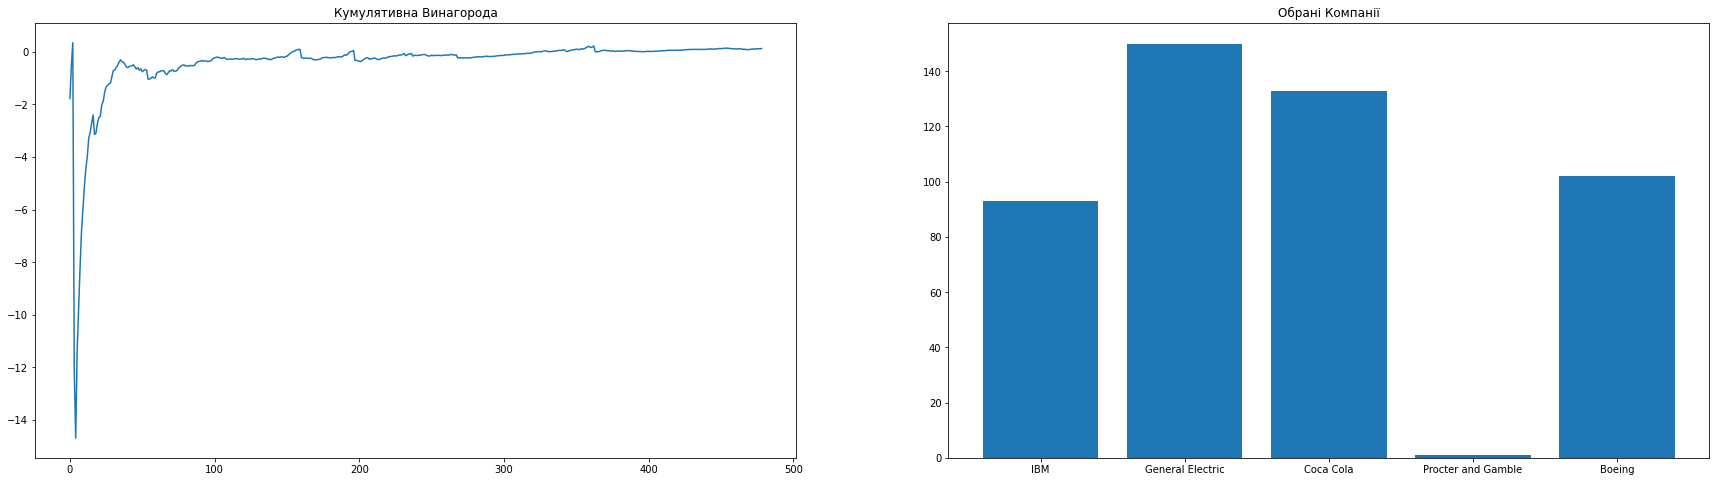

In [436]:
    ucb_agent = UCBAgent(environment, c=16.3, max_iterations=478)
    ucb_history = ucb_agent.act()
    print(f"Кінцева винагорода : {sum(ucb_history['rewards'])}")
    plot_history(ucb_history)

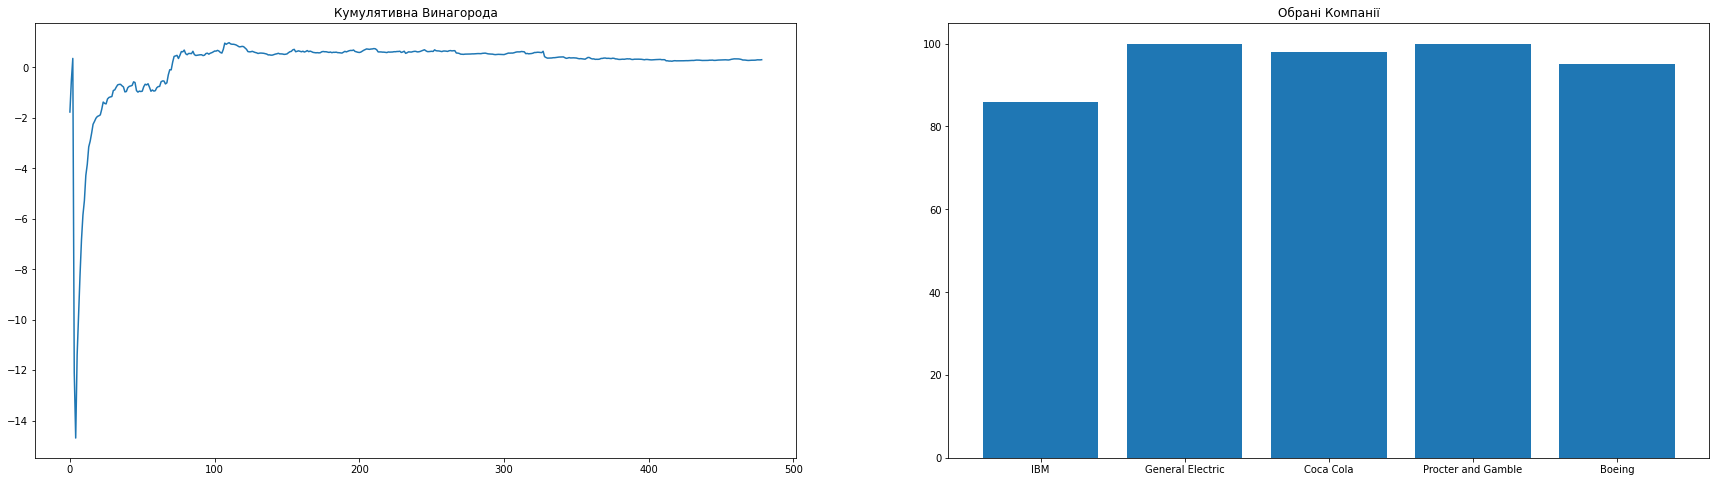

In [434]:
plot_history(ucb_history)

In [373]:
sort = resuullllt

In [374]:
sort.sort(reverse=True)

In [375]:
sort

[290.3294891199999,
 272.76010568,
 252.37021295599996,
 252.37021295599996,
 252.37021295599996,
 252.37021295599996,
 252.37021295599996,
 246.03378522999998,
 239.31870484599995,
 230.8964743200005,
 230.8964743200005,
 230.8964743200005,
 227.3442794339999,
 223.51023386999998,
 211.59965325999985,
 211.59965325999985,
 210.42465227000014,
 209.38845860599974,
 206.8340365539999,
 206.10136850999993,
 204.38365035000004,
 195.5383022239998,
 195.5383022239998,
 194.0895838660005,
 191.68769809399984,
 191.68769809399984,
 190.78005886999998,
 188.35388727999973,
 185.6575309700002,
 184.7381471099997,
 183.0864744800001,
 182.66900660999994,
 182.63945547999998,
 181.9322945059998,
 177.17860663,
 169.02232502399966,
 169.02232502399966,
 169.02232502399966,
 169.02232502399966,
 169.02232502399966,
 169.02232502399966,
 168.78460263599965,
 168.57354797599993,
 168.57354797599993,
 167.17616261000012,
 164.19056034000005,
 160.33829856999995,
 159.7034534039999,
 158.5414362999999

In [33]:
max(more1)

TypeError: 'NoneType' object is not iterable

In [29]:
more1=more1.sort(reverse=True)

In [32]:
print(more1)

None
